In [ ]:
# Import Libraries

import tweepy 
import pandas as pd
import numpy as np

from IPython.display import display
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

## Extract Twitter Data using Tweepy & Pandas 

In [2]:
# Twitter App consumer & access keys for @user

CONSUMER_KEY = 'icR7UZ1X6DT9muWyO5HFQtdk5'
CONSUMER_SECRET = 'paIzD6aQ6utvR2nCTXuB7zJFQxKAXqlDOIWumBWjFGQv6Zjvzb'

ACCESS_TOKEN = '1032360218498191360-k140l40vKZ3wgWFPfwSfdJHgS5E8g5'
ACCESS_SECRET = 'S2xm3GygSmlfhHehFLZJi7AeiMRLeryR4pn9EfS46LeoO'


In [4]:
# API function

def twitter_setup():
    """
    Utility function to setup the Twitter's API
    with our access keys provided.
    """
    auth = tweepy.OAuthHandler(CONSUMER_KEY, CONSUMER_SECRET)
    auth.set_access_token(ACCESS_TOKEN, ACCESS_SECRET)
    
    api = tweepy.API(auth)
    return api

    

In [5]:
# Extract tweets

extractor = twitter_setup()

tweets = extractor.user_timeline(screen_name="realDonaldTrump", count=200)
print("Number of tweets extracted: {}.\n".format(len(tweets)))

print("5 recent tweets:\n")
for tweet in tweets[:5]:
    print(tweet.text)
    print()
    

Number of tweets extracted: 200.

5 recent tweets:

RT @DeptofDefense: More than 7,000 #ServiceMembers, @USNationalGuard and #ActiveDuty, are standing by to assist as #HurricaneFlorence hits…

RT @NCEmergency: Use these resources to get help or more info. For emergencies, call 911. To receive info on shelters, evacuations &amp; storm…

RT @NCEmergency: #FlorenceNC safety tips:
- STAY INDOORS. Do not venture out during the storm.
- Do NOT drive or walk through stagnant or m…

RT @NHC_Atlantic: NEW: #Hurricane #Florence has made landfall near Wrightsville Beach, North Carolina at 7:15 AM EDT (1115 UTC) with estima…

Incredible job being done by FEMA, First Responders, Law Enforcement and all. Thank you!



In [10]:
# Create a pandas DataFrame
# List comprehension 

data = pd.DataFrame(data=[tweet.text for tweet in tweets], columns=['Tweets'])

# IPython's display function plots an output in a neat way
# Display first ten elements of DataFrame

display(data.head(10))


Tweets
0  RT @DeptofDefense: More than 7,000 #ServiceMem...
1  RT @NCEmergency: Use these resources to get he...
2  RT @NCEmergency: #FlorenceNC safety tips:\n- S...
3  RT @NHC_Atlantic: NEW: #Hurricane #Florence ha...
4  Incredible job being done by FEMA, First Respo...
5  RT @USNationalGuard: Today, nearly 3,000 Natio...
6  RT @fema: We have created a rumor control page...
7  RT @FEMAespanol: Hoy es el último día para des...
8  RT @RedCross: We are on the ground helping pre...
9  RT @HHSGov: If you're ordered to evacuate ahea...

In [12]:
# Internal methods of a single tweet object:
# Output following list of elements

print(dir(tweets[0]))


['__class__', '__delattr__', '__dict__', '__dir__', '__doc__', '__eq__', '__format__', '__ge__', '__getattribute__', '__getstate__', '__gt__', '__hash__', '__init__', '__init_subclass__', '__le__', '__lt__', '__module__', '__ne__', '__new__', '__reduce__', '__reduce_ex__', '__repr__', '__setattr__', '__sizeof__', '__str__', '__subclasshook__', '__weakref__', '_api', '_json', 'author', 'contributors', 'coordinates', 'created_at', 'destroy', 'entities', 'favorite', 'favorite_count', 'favorited', 'geo', 'id', 'id_str', 'in_reply_to_screen_name', 'in_reply_to_status_id', 'in_reply_to_status_id_str', 'in_reply_to_user_id', 'in_reply_to_user_id_str', 'is_quote_status', 'lang', 'parse', 'parse_list', 'place', 'retweet', 'retweet_count', 'retweeted', 'retweeted_status', 'retweets', 'source', 'source_url', 'text', 'truncated', 'user']


In [13]:
# We print info from the first tweet:

print(tweets[0].id)
print(tweets[0].created_at)
print(tweets[0].source)
print(tweets[0].favorite_count)
print(tweets[0].retweet_count)
print(tweets[0].geo)
print(tweets[0].coordinates)
print(tweets[0].entities)


1040647412510015490
2018-09-14 17:04:12
Twitter for iPhone
0
2449
None
None
{'hashtags': [{'text': 'ServiceMembers', 'indices': [35, 50]}, {'text': 'ActiveDuty', 'indices': [73, 84]}, {'text': 'HurricaneFlorence', 'indices': [115, 133]}], 'symbols': [], 'user_mentions': [{'screen_name': 'DeptofDefense', 'name': 'U.S. Dept of Defense', 'id': 66369181, 'id_str': '66369181', 'indices': [3, 17]}, {'screen_name': 'USNationalGuard', 'name': 'National Guard', 'id': 31310158, 'id_str': '31310158', 'indices': [52, 68]}], 'urls': []}


In [14]:
# Adding relevant info into our DataFrame
# New column added 
# List Comprehension 

data['len']  = np.array([len(tweet.text) for tweet in tweets])
data['ID']   = np.array([tweet.id for tweet in tweets])
data['Date'] = np.array([tweet.created_at for tweet in tweets])
data['Source'] = np.array([tweet.source for tweet in tweets])
data['Likes']  = np.array([tweet.favorite_count for tweet in tweets])
data['RTs']    = np.array([tweet.retweet_count for tweet in tweets])


In [15]:
# Display of first 10 elements from DataFrame:

display(data.head(10))

Tweets  len  \
0  RT @DeptofDefense: More than 7,000 #ServiceMem...  139   
1  RT @NCEmergency: Use these resources to get he...  143   
2  RT @NCEmergency: #FlorenceNC safety tips:\n- S...  140   
3  RT @NHC_Atlantic: NEW: #Hurricane #Florence ha...  140   
4  Incredible job being done by FEMA, First Respo...   88   
5  RT @USNationalGuard: Today, nearly 3,000 Natio...  140   
6  RT @fema: We have created a rumor control page...  140   
7  RT @FEMAespanol: Hoy es el último día para des...  140   
8  RT @RedCross: We are on the ground helping pre...  140   
9  RT @HHSGov: If you're ordered to evacuate ahea...  140   

                    ID                Date              Source  Likes    RTs  
0  1040647412510015490 2018-09-14 17:04:12  Twitter for iPhone      0   2449  
1  1040642566985867265 2018-09-14 16:44:56  Twitter for iPhone      0   1483  
2  1040593432824213507 2018-09-14 13:29:42  Twitter for iPhone      0   3497  
3  1040593389794865154 2018-09-14 13:29:32  Twitter for iPhone      0   5682  
4  1040575890139348992 2018-09-14 12:19:59  Twitter for iPhone  55848  11746  
5  1040565273802301441 2018-09-14 11:37:48  Twitter for iPhone      0   5008  
6  1040564736977502208 2018-09-14 11:35:40  Twitter for iPhone      0   7342  
7  1040564576528621568 2018-09-14 11:35:02  Twitter for iPhone      0   1915  
8  1040564426775126016 2018-09-14 11:34:26  Twitter for iPhone      0   2830  
9  1040564259833487360 2018-09-14 11:33:46  Twitter for iPhone      0   2112

## Visualizations and Descriptive Statistics 

In [17]:
# Extract the mean of lenghts:

mean = np.mean(data['len'])

print("The length's average in tweets: {}".format(mean))

The length's average in tweets: 118.83


In [20]:
# Extract the tweet with more FAVs and more RTs:

favorite_max = np.max(data['Likes'])
retweet_max  = np.max(data['RTs'])

favorite = data[data.Likes == favorite_max].index[0]
retweet  = data[data.RTs == retweet_max].index[0]

# Max Favorite Tweets:

print("The tweet with more likes is: \n{}".format(data['Tweets'][fav]))
print("Number of likes: {}".format(favorite_max))
print("{} characters.\n".format(data['len'][fav]))

# Max Retweets:

print("The tweet with more retweets is: \n{}".format(data['Tweets'][rt]))
print("Number of retweets: {}".format(retweet_max))
print("{} characters.\n".format(data['len'][rt]))

The tweet with more likes is: 
I’m draining the Swamp, and the Swamp is trying to fight back. Don’t worry, we will win!
Number of likes: 203580
88 characters.

The tweet with more retweets is: 
I’m draining the Swamp, and the Swamp is trying to fight back. Don’t worry, we will win!
Number of retweets: 53305
88 characters.



In [21]:
 # Create time series for data:

time_len = pd.Series(data=data['len'].values, index=data['Date'])
time_favorite = pd.Series(data=data['Likes'].values, index=data['Date'])
time_retweet = pd.Series(data=data['RTs'].values, index=data['Date'])

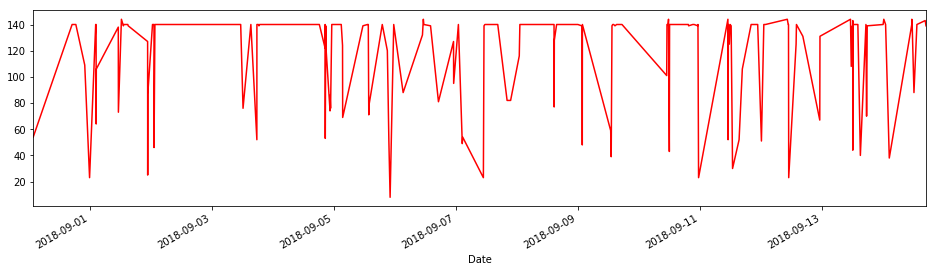

In [22]:
# Lenghts along time:

time_len.plot(figsize=(16,4), color='r');


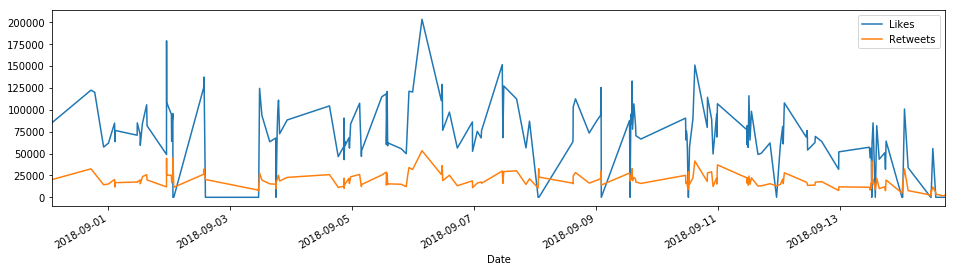

In [23]:
# Likes vs retweets visualization:

time_favorite.plot(figsize=(16,4), label="Likes", legend=True)
time_retweet.plot(figsize=(16,4), label="Retweets", legend=True);


## Sentiment Analysis

As we mentioned at the beginning of this post, textblob will allow us to do sentiment analysis in a very simple way. We will also use the re library from Python, which is used to work with regular expressions. For this, I'll provide you two utility functions to: a) clean text (which means that any symbol distinct to an alphanumeric value will be remapped into a new one that satisfies this condition), and b) create a classifier to analyze the polarity of each tweet after cleaning the text in it. 

In [26]:
from textblob import TextBlob
import re


In [29]:
# Function to clean Tweets

def clean_tweet(tweet):
    '''
    Utility function to clean the text in a tweet by removing 
    links and special characters using regex.
    '''
    return ' '.join(re.sub("(@[A-Za-z0-9]+)|([^0-9A-Za-z \t])|(\w+:\/\/\S+)", " ", tweet).split())



# Function to analyze Tweet sentiments and classify Tweets

def analyze_sentiment(tweet):
    '''
    Utility function to classify the polarity of a tweet
    using textblob.
    '''
    analysis = TextBlob(clean_tweet(tweet))
    if analysis.sentiment.polarity > 0:
        return 1
    elif analysis.sentiment.polarity == 0:
        return 0
    else:
        return -1

In [36]:
# Create a new column with the result of the analysis:

data['SA'] = np.array([analyze_sentiment(tweet) for tweet in data['Tweets']])

# Display the updated dataframe with the new column:

display(data.head(10))

Tweets  len  \
0  RT @DeptofDefense: More than 7,000 #ServiceMem...  139   
1  RT @NCEmergency: Use these resources to get he...  143   
2  RT @NCEmergency: #FlorenceNC safety tips:\n- S...  140   
3  RT @NHC_Atlantic: NEW: #Hurricane #Florence ha...  140   
4  Incredible job being done by FEMA, First Respo...   88   
5  RT @USNationalGuard: Today, nearly 3,000 Natio...  140   
6  RT @fema: We have created a rumor control page...  140   
7  RT @FEMAespanol: Hoy es el último día para des...  140   
8  RT @RedCross: We are on the ground helping pre...  140   
9  RT @HHSGov: If you're ordered to evacuate ahea...  140   

                    ID                Date              Source  Likes    RTs  \
0  1040647412510015490 2018-09-14 17:04:12  Twitter for iPhone      0   2449   
1  1040642566985867265 2018-09-14 16:44:56  Twitter for iPhone      0   1483   
2  1040593432824213507 2018-09-14 13:29:42  Twitter for iPhone      0   3497   
3  1040593389794865154 2018-09-14 13:29:32  Twitter for iPhone      0   5682   
4  1040575890139348992 2018-09-14 12:19:59  Twitter for iPhone  55848  11746   
5  1040565273802301441 2018-09-14 11:37:48  Twitter for iPhone      0   5008   
6  1040564736977502208 2018-09-14 11:35:40  Twitter for iPhone      0   7342   
7  1040564576528621568 2018-09-14 11:35:02  Twitter for iPhone      0   1915   
8  1040564426775126016 2018-09-14 11:34:26  Twitter for iPhone      0   2830   
9  1040564259833487360 2018-09-14 11:33:46  Twitter for iPhone      0   2112   

   SA  
0   1  
1   1  
2   0  
3   1  
4   1  
5   1  
6   0  
7   0  
8   1  
9   0

As we can see above, the last column contains the sentiment analysis (SA).  Next, in order to have a simple way to verify the results, we will count the number of neutral, positive and negative Tweets and extract the percentages.

In [33]:
# We construct lists with classified tweets:
# List comprehension + enumerate function 

positive_tweets = [tweet for index, tweet in enumerate(data['Tweets']) if data['SA'][index] > 0]
neutral_tweets = [tweet for index, tweet in enumerate(data['Tweets']) if data['SA'][index] == 0]
negative_tweets = [tweet for index, tweet in enumerate(data['Tweets']) if data['SA'][index] < 0]

In [35]:
# Calculate and print percentages:

print("Percentage of positive tweets: {}%".format(len(positive_tweets) * 100 / len(data['Tweets'])))
print("Percentage of neutral tweets: {}%".format(len(neutral_tweets) * 100 / len(data['Tweets'])))
print("Percentage de negative tweets: {}%".format(len(negative_tweets) * 100 / len(data['Tweets'])))

Percentage of positive tweets: 52.0%
Percentage of neutral tweets: 32.0%
Percentage de negative tweets: 16.0%


We have to consider that we're working only with the 200 most recent tweets from D. Trump. For more accurate results we can consider more tweets.